In [1]:
import os
import pandas as pd
from pandasai import SmartDataframe
from pandasai import Agent
from pandasai.llm import BambooLLM

In [2]:
#DataFrame
df = pd.read_csv('kc_house_data.csv')

#API key
# llm = BambooLLM(api_key="$2a$10$MRAuSrmyjIQjPfqTm29ss.nQICo6GzgUKz1.TBp/gSmATcjtv6tz2")
# df = SmartDataframe(df, config={"llm": llm})
os.environ['PANDASAI_API_KEY'] = '$2a$10$MRAuSrmyjIQjPfqTm29ss.nQICo6GzgUKz1.TBp/gSmATcjtv6tz2'
pandas_ai = Agent(df)

In [ ]:
request = """what is the mean price of all 5 bedroom houses for each distinct zipcode."""
response = pandas_ai.chat(request)
print(response)

                price
zipcode              
98001    3.185162e+05
98002    2.706000e+05
98003    4.281750e+05
98004    1.865356e+06
98005    8.801970e+05
...               ...
98177    9.538305e+05
98178    3.834772e+05
98188    3.487682e+05
98198    3.457176e+05
98199    1.211962e+06

[70 rows x 1 columns]


In [ ]:
request = """for each zipcode, compute the mean price of all 5 bedroom houses. 
    Display the data in a table and then make a barchart of price versus zip"""
response = df.chat(response)
print(response)

AttributeError: 'SmartDataframe' object has no attribute 'generate_code'

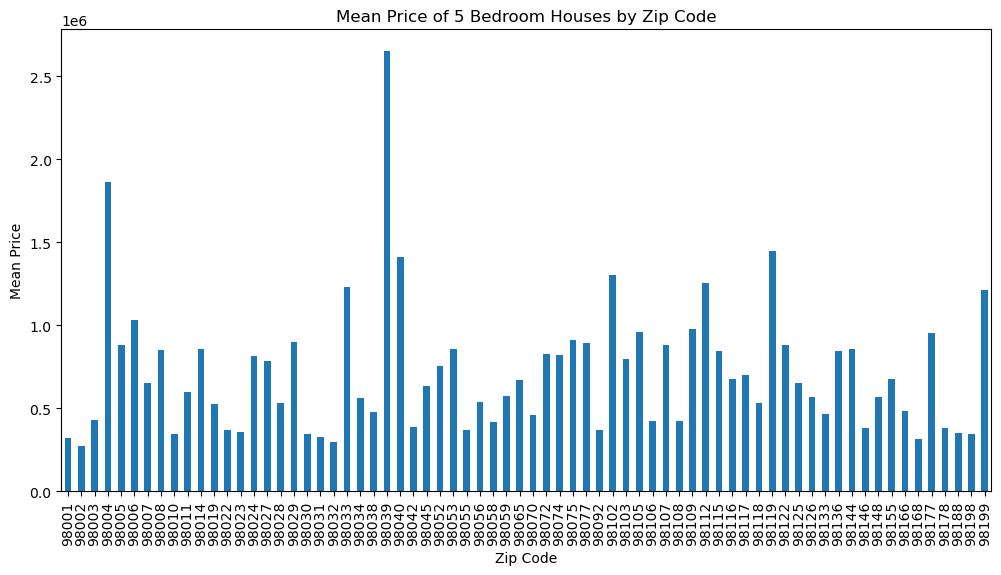

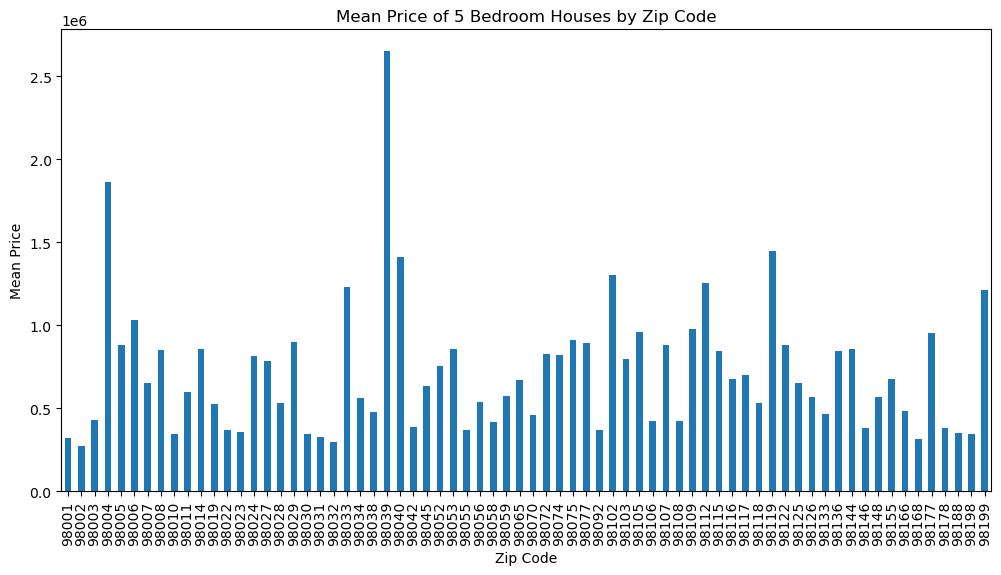

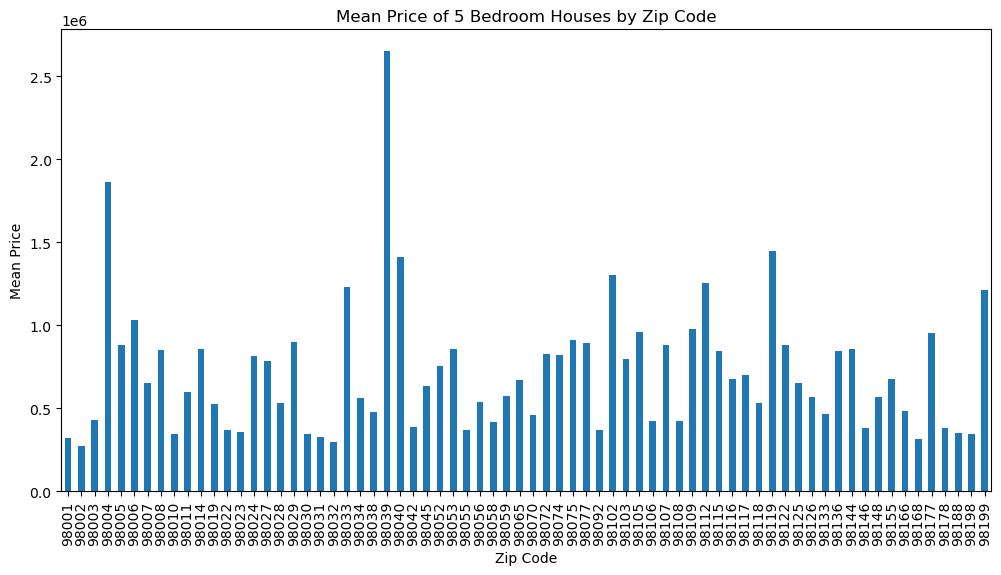

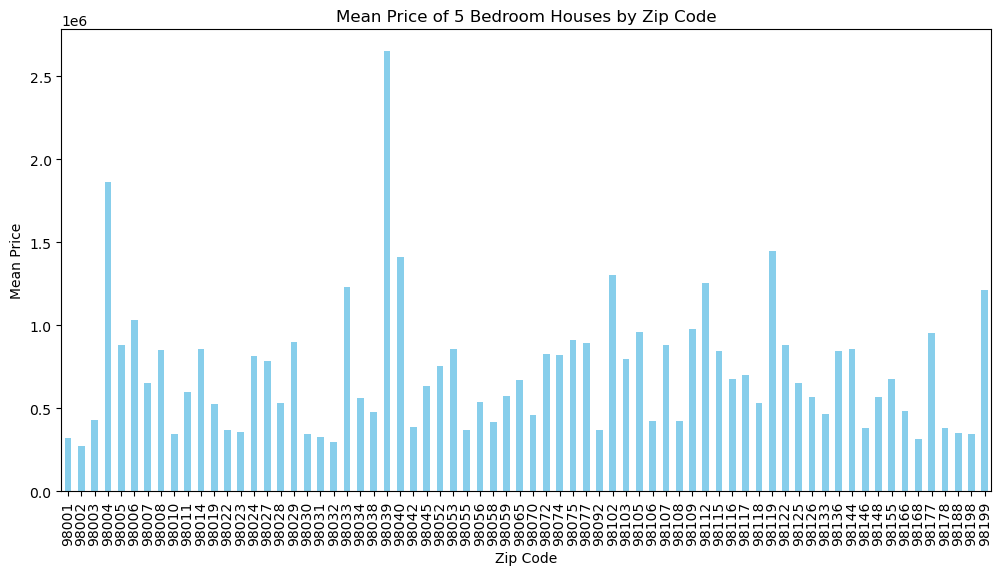

Traceback (most recent call last):
  File "c:\Users\jason\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\Users\jason\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\jason\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\Users\jason\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\Users\jason\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jason\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [ ]:
request = """compute the mean price of all 5 bedroom houses grouped by zip code,  
    then make one single barchart of price versus zip in a single figure. dont save the plot as a file"""
pandas_ai.generate_code(request)

In [17]:
#train a regression model to predict price. use 70:30 train:test split. use the model to make predictions on the test sample. 
# then plot model predictions versus actuals

In [6]:
request = """generate python code to train a model to predict house prices. use 70 to 30 train test split,
and then predict prices for the test sample. if a data point has a missing value, 
remove it, and then create a plot using logarithmic axes to show predicted price vs actual price.
use random forest for the best results.
dont save as a file, and set s=1 in the scatterplot.
also overplot in red y=x where x ranges from 5*10^4 to 5*10^6 using a dashed line .
and include a legend in the plot."""
response = pandas_ai.generate_code(request)
print(response)

data = {'id': [524059323, 126059097, 9297300395], 'date': ['20140608T000000', '20140607T000000', '20150410T000000'], 'price': [346950.0, 194820.0, 384205.0], 'bedrooms': [1, 8, 9], 'bathrooms': [3.75, 7.75, 3.5], 'sqft_living': [5110, 4300, 1876], 'sqft_lot': [2409, 12997, 8178], 'floors': [2.0, 1.0, 3.5], 'waterfront': [0, 1, 0], 'view': [0, 4, 3], 'condition': [1, 3, 5], 'grade': [5, 7, 12], 'sqft_above': [2820.0, 2448.0, None], 'sqft_basement': [417, 650, 490], 'yr_built': [1912, 1989, 2003], 'yr_renovated': [1998, 1985, 2010], 'zipcode': [98052, 98117, 98056], 'lat': [47.4124, 47.5185, 47.3525], 'long': [-122.19, -122.356, -122.374], 'sqft_living15': [1691, 1400, 1080], 'sqft_lot15': [11541, 14163, 10487]}
df = dfs[0]
df.dropna(inplace=True)
X = df.drop(['id', 'date', 'price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_tes